# Проект - Продвинутый SQL

### Постановка задачи

В самостоятельном проекте вы будете работать с базой данных StackOverflow — сервиса вопросов и ответов о программировании. StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам. В этой части проекта нужно будет написать несколько SQL-запросов в Jupyter Notebook. Необходимые данные находятся в таблицах схемы `stackoverflow`.

### ER-Диаграмма базы данных

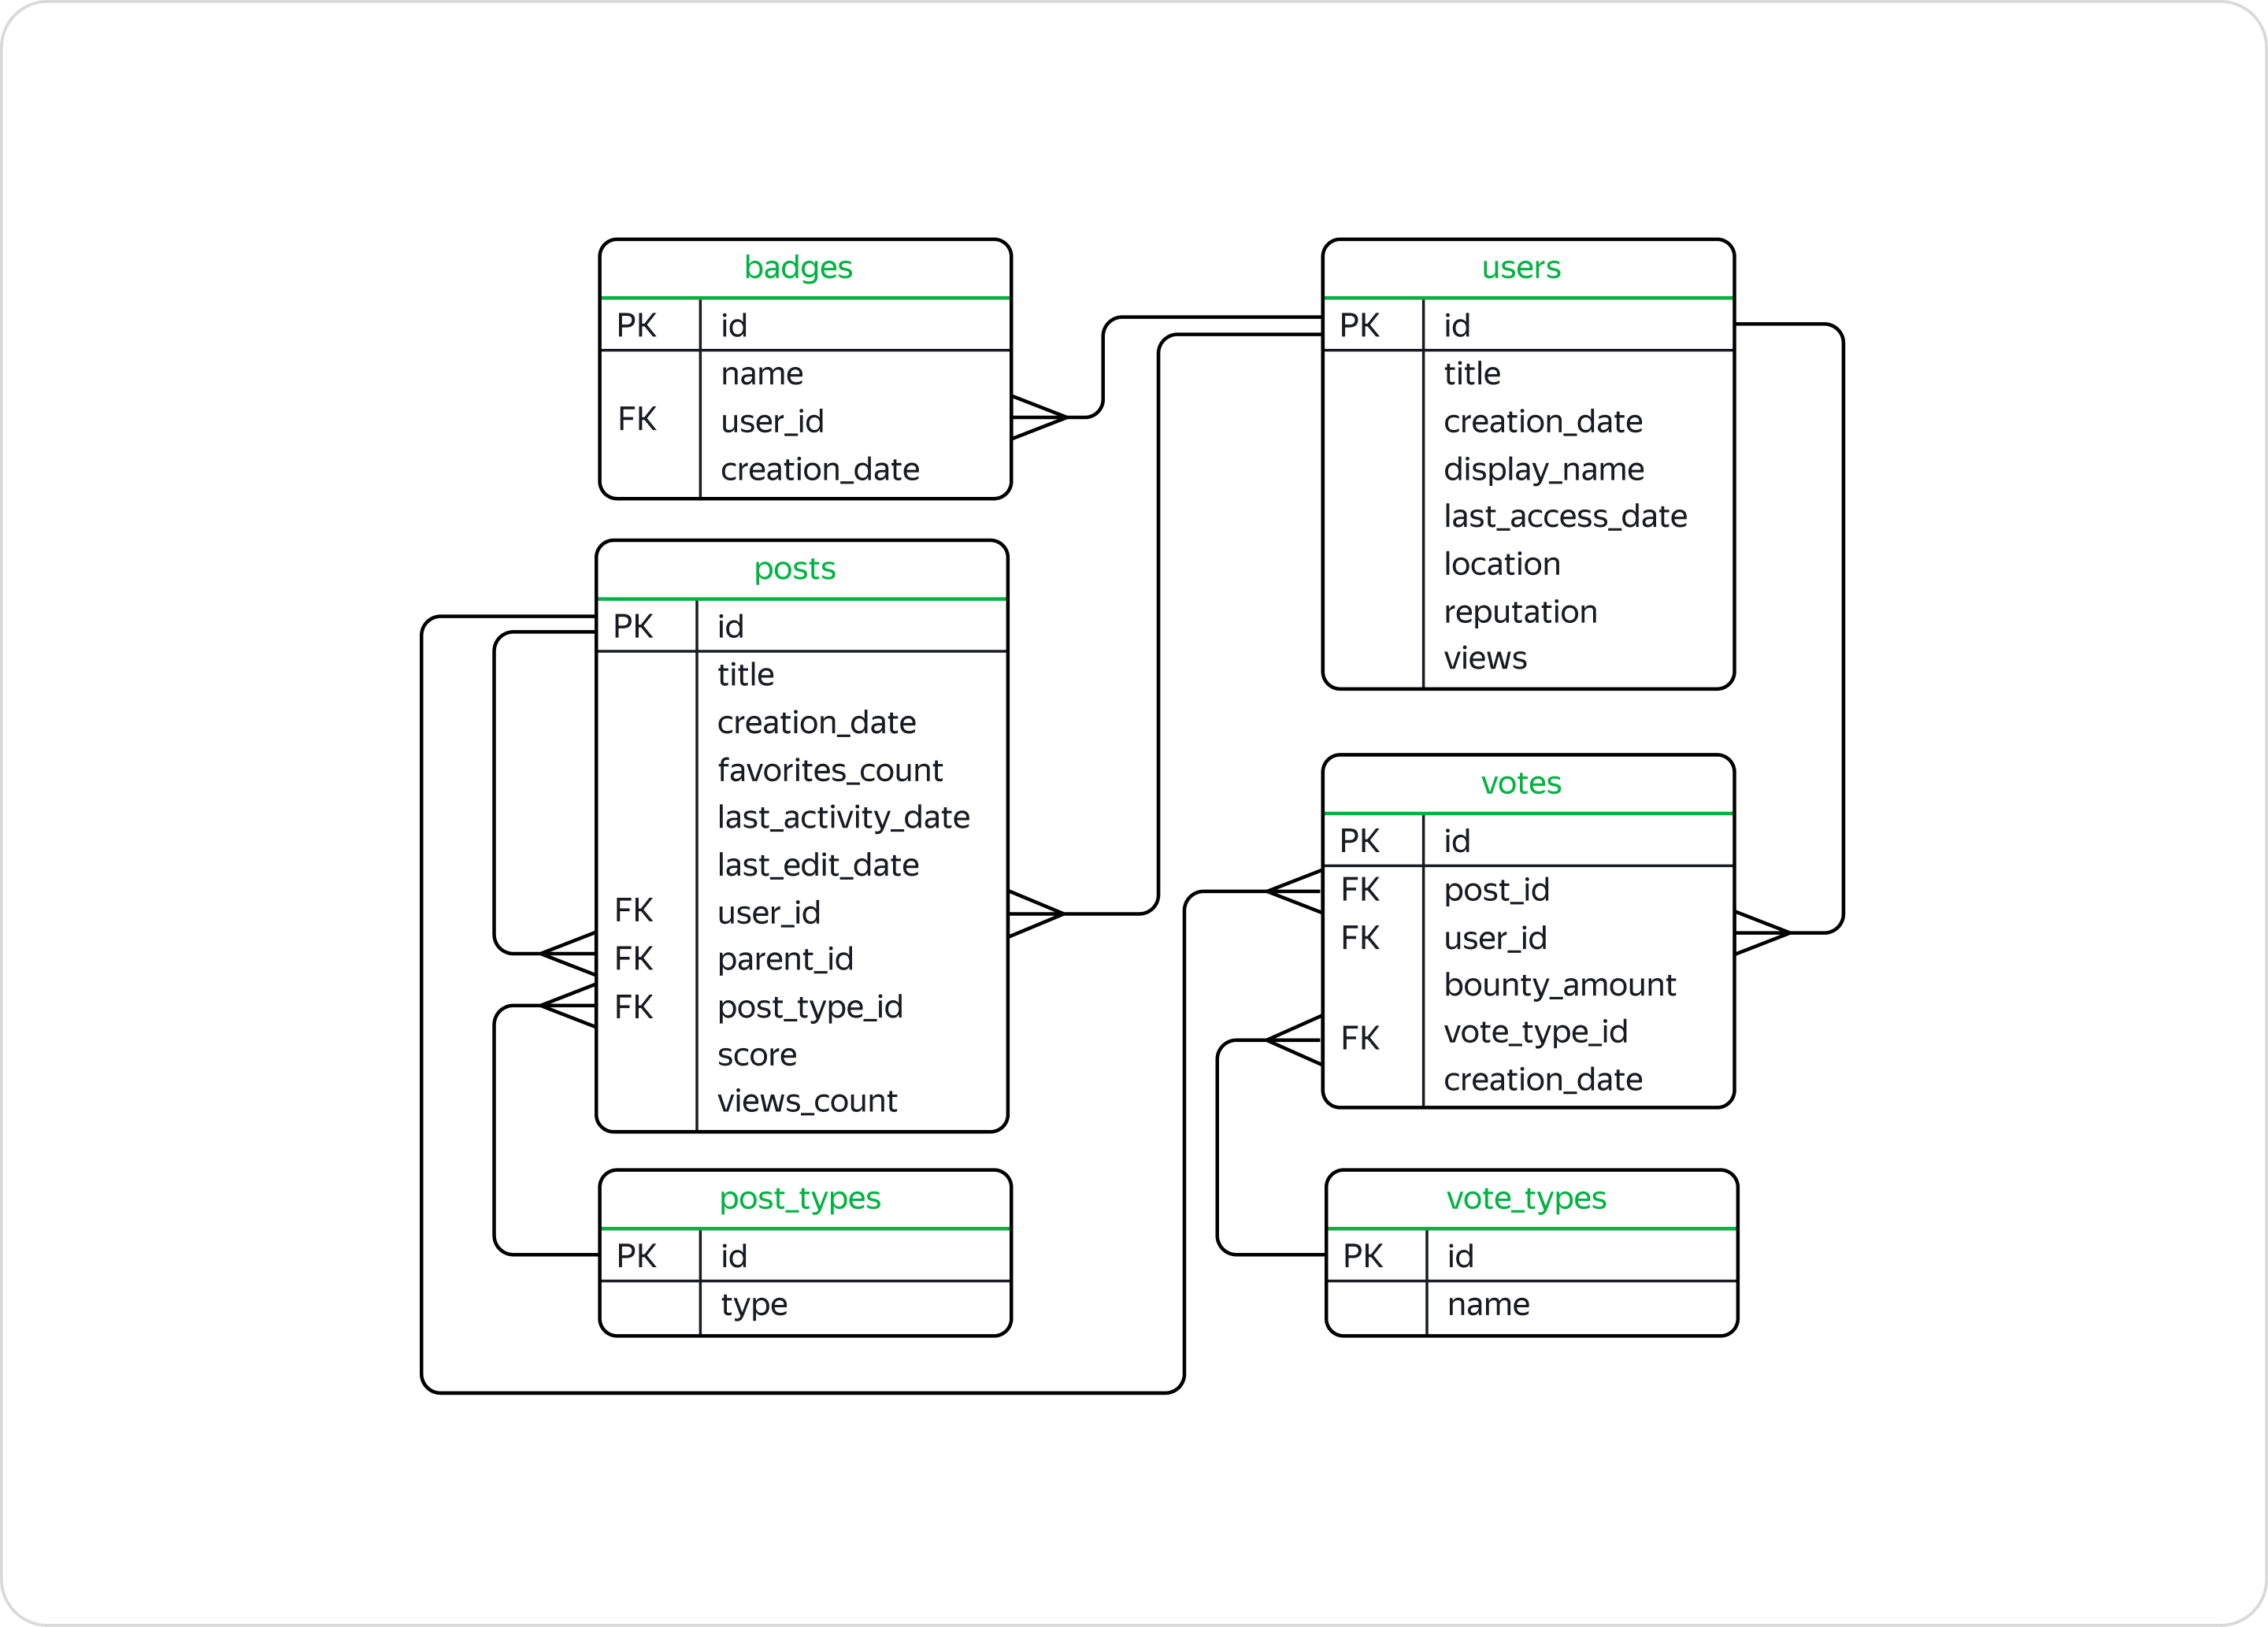

### Описание данных

***Таблица badges***

Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql.

* `id` - Идентификатор значка, первичный ключ таблицы
* `name` - Название значка
* `user_id` - Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице users
* `creation_date` - Дата присвоения значка

***Таблица post_types***

Содержит информацию о типе постов. Их может быть два: Question — пост с вопросом и Answer — пост с ответом.

* `id` - Идентификатор поста, первичный ключ таблицы
* `type` -	Тип поста

***Таблица posts***

Содержит информацию о постах.

* `id` - Идентификатор поста, первичный ключ таблицы
* `title` -	Заголовок поста
* `creation_date` -	Дата создания поста
* `favorites_count` - Число, которое показывает, сколько раз пост добавили в «Закладки»
* `last_activity_date` - Дата последнего действия в посте, например комментария
* `last_edit_date` -Дата последнего изменения поста
* `user_id` - Идентификатор пользователя, который создал пост, внешний ключ к таблице users
* `parent_id` -	Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом
* `post_type_id` - Идентификатор типа поста, внешний ключ к таблице post_types
* `score` -	Количество очков, которое набрал пост
* `views_count` - Количество просмотров

***Таблица users***

Содержит информацию о пользователях.

* `id` -	Идентификатор пользователя, первичный ключ таблицы
* `creation_date` -	Дата регистрации пользователя
* `display_name` -	Имя пользователя
* `last_access_date` -	Дата последнего входа
* `location` -	Местоположение
* `reputation` -	Очки репутации, которые получают за хорошие вопросы и полезные ответы
* `views` -	Число просмотров профиля пользователя

***Таблица vote_types***

Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько:

    1. UpMod — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
    2. DownMod — такую отметку получают посты, которые показались пользователям наименее полезными.
    3. Close — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
    4. Offensive — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
    5. Spam — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

* `id` -	Идентификатор типа голоса, первичный ключ
* `name` -	Название метки

***Таблица votes***

Содержит информацию о голосах за посты.

* `id` -	Идентификатор голоса, первичный ключ
* `post_id` -	Идентификатор поста, внешний ключ к таблице posts
* `user_id` -	Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице users
* `bounty_amount` -	Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту
* `vote_type_id` -	Идентификатор типа голоса, внешний ключ к таблице vote_types
* `creation_date` -	Дата назначения голоса

### Загрузка библиотек

In [1]:
# загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных 
Эта база данных содержит схему `stackoverflow`, с которой мы будем работать в проекте

In [2]:
db_config = []
with open('params_db.txt') as f:
    for line in f:
        db_config.append(line.strip())

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config[0], # имя пользователя
    db_config[1], # пароль
    db_config[2], # название сервера
    db_config[3], # порт подключения
    db_config[4], # название базы данных
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Проверим связь с БД

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


**Связь с БД есть!**

## Задание 1

Вывесьт общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортировать по убыванию общего количества просмотров.

In [6]:
# пишем запрос
query = '''
SELECT DISTINCT(CAST(DATE_TRUNC('month', creation_date) AS date)) AS month_date,
       SUM(views_count) OVER(PARTITION BY CAST(DATE_TRUNC('month', creation_date) AS date)) AS total_views
FROM stackoverflow.posts
WHERE creation_date BETWEEN '2008-01-01' AND '2008-12-31'
ORDER BY total_views DESC
'''

# и выполняем его
query_1 = pd.read_sql_query(query, con=engine)

In [7]:
query_1

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


**Вывод**

Разница в просмотрах по месяцам достаточно заметная, особенно между июлем (в который было меньше всего просмотров постов) и другими месяцами - разница в 3 порядка. Это связано с количеством постов, которые выходили в эти месяца, в июле практически не было постов, поэтому и просмотров так мало. Сам сервис начал свою работу официально в августе 2008 года, то есть основная часть постов начала появлятся только с августа.

## Задание 2

Вывести имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитываются. Для каждого имени пользователя вывести количество уникальных значений `user_id`. Отсортировать результат по полю с именами в лексикографическом порядке.

In [8]:
query = '''
SELECT u.display_name,
       COUNT(DISTINCT user_id)  
FROM stackoverflow.posts AS p
LEFT JOIN stackoverflow.users AS u ON u.id=p.user_id
WHERE parent_id != 0 AND p.creation_date::date BETWEEN ((u.creation_date::date)) 
                                               AND ((u.creation_date::date) + INTERVAL '1 month')
GROUP BY u.display_name
HAVING COUNT(p.parent_id) > 100
ORDER BY u.display_name ASC
'''

query_2 = pd.read_sql_query(query, con=engine)

In [9]:
query_2

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


**Вывод**

Система регистрации позволяет иметь разным пользователям одинаковый никнейм. Скорее всего, разработчики не досмотрели этот момент, когда запускали первую версию сайта.

## Задание 3

Вывести количество постов за 2008 год по месяцам. Отобрать посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортировать таблицу по значению месяца по убыванию.

In [10]:
query = '''
SELECT CAST(DATE_TRUNC('month', p.creation_date) AS date) AS month_date,
       COUNT(p.id) AS posts_count
FROM stackoverflow.posts AS p
LEFT JOIN stackoverflow.users AS u ON u.id=p.user_id
WHERE  DATE_TRUNC('month', u.creation_date) = '2008-09-01'
       AND p.user_id IN
                     (SELECT p.user_id
                      FROM stackoverflow.users AS u
                      RIGHT JOIN stackoverflow.posts AS p ON u.id=p.user_id
                      WHERE p.creation_date BETWEEN '2008-12-01' AND '2008-12-31')
GROUP BY month_date
ORDER BY month_date DESC
'''

query_3 = pd.read_sql_query(query, con=engine)

In [11]:
query_3

,month_date,posts_count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


**Вывод**

В итоговой таблице можно увидеть 32 поста в августе, то есть перед тем как пользователь успел зарегистрироваться. Скорее всего проблемы в самих данных или это такая фича на сайте 🤯

## Задание 4

Используя данные о постах, вывести несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [12]:
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id ASC, creation_date ASC
'''

query_4 = pd.read_sql_query(query, con=engine)

In [13]:
query_4

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


## Задание 5

Найти среднее количество постов пользователей в день за август 2008 года. Отобрать данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывать. 

Отсортировать результат по возрастанию среднего количества постов. Значения можно не округлять.

In [14]:
query = '''
WITH t1 AS
    (SELECT user_id,
            CAST(DATE_TRUNC('day', creation_date) AS date) AS days,
            COUNT(id)  AS posts_count
    FROM stackoverflow.posts
    WHERE user_id IN
          (SELECT user_id
           FROM stackoverflow.posts
           WHERE DATE_TRUNC('month', creation_date) = '2008-08-01'
           GROUP BY user_id
           HAVING COUNT(id) > 120)
           AND (DATE_TRUNC('day', creation_date) >= '2008-08-01' AND DATE_TRUNC('day', creation_date) <= '2008-08-31')
    GROUP BY user_id, CAST(DATE_TRUNC('day', creation_date) AS date))
    
SELECT user_id,
       AVG(posts_count) AS avg_daily
FROM t1
GROUP BY user_id
ORDER BY avg_daily ASC
'''

query_5 = pd.read_sql_query(query, con=engine)

In [15]:
query_5

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


## Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отобрать дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число - не забыть округлить значение

In [16]:
query = '''
SELECT ROUND(AVG(avg_activity))
FROM
       (WITH t1 AS 
           (SELECT CAST(DATE_TRUNC('day', creation_date) AS date) AS days,
                   user_id,
                   COUNT(id) AS activity_count
            FROM stackoverflow.posts
            WHERE creation_date BETWEEN '2008-12-01' AND '2008-12-07'
            GROUP BY days, user_id)
        SELECT AVG(activity_count) OVER(PARTITION BY user_id ORDER BY days) AS avg_activity
        FROM t1) AS t2
'''

query_6 = pd.read_sql_query(query, con=engine)

In [17]:
query_6

,round
0,2.0


**Вывод**

За первую неделю декабря в среднем пользователи были активны всего 2 дня из 7.

## Задание 7

Вывести историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортировать вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавить в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, указать `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` не нужно.

In [18]:
query = '''
SELECT user_id,
       creation_date,
       TO_CHAR(LAG(creation_date, 2, NULL) OVER(PARTITION BY user_id ORDER BY creation_date), 'Month') AS second_last_month
FROM stackoverflow.posts
'''

query_7 = pd.read_sql_query(query, con=engine)

In [19]:
query_7

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


## Задание 8

Рассчитать аналог Retention Rate по месяцам для пользователей StackOverflow. Объединить пользователей в когорты по месяцу их первого поста. Возвращение будем определять по наличию поста в текущем месяце. 

In [20]:
query = '''
WITH profile AS
  (SELECT user_id,
          DATE_TRUNC('month', MIN(creation_date))::date AS dt,
          COUNT(*) OVER (PARTITION BY DATE_TRUNC('month', MIN(creation_date))::date) AS cohort_users_cnt
   FROM stackoverflow.posts
   GROUP BY 1),
   
sessions AS
  (SELECT user_id,
          DATE_TRUNC('month', creation_date)::date AS session_dt
   FROM stackoverflow.posts
   GROUP BY 1,2)
   
SELECT p.dt,
       s.session_dt,
       COUNT(p.user_id) AS total_users,
       p.cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / p.cohort_users_cnt, 2) AS retention_rate
FROM profile AS p
JOIN sessions AS s ON s.user_id=p.user_id
GROUP BY 1,2,4
'''

query_8 = pd.read_sql_query(query, con=engine)

In [21]:
query_8

,dt,session_dt,total_users,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Построить тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулировать гипотезы о возможных причинах.

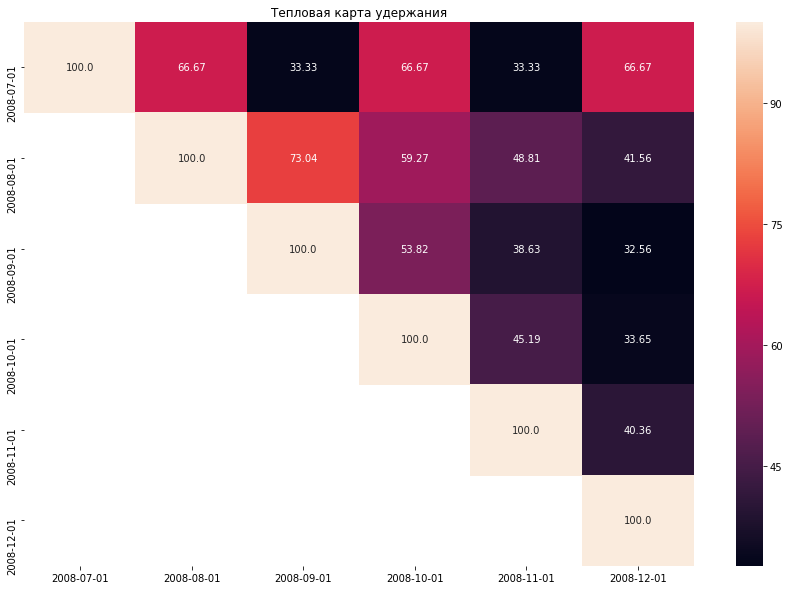

In [22]:
# создаём сводную таблицу с результатами
retention = query_8.pivot('dt', 'session_dt', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим тепловую карту
plt.figure(figsize=(15, 10)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта удержания') # название графика
plt.show()

**Вывод**

Сразу бросается в глаза то, что удержание для первой когорты от июля очень сильно различается, удержание прыгает от месяца к месяцу от 66 до 33 процентов, но это легко объясняется тем, что в первую когорту входило всего 3 человека, поэтому и разброс такой большой. 
В других когортах уже было уже намного больше пользователей, удержание вело себя более привычно

## Задание 9

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразить таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлить значение процента до двух знаков после запятой.

In [23]:
query = '''
WITH posts_count AS
   (SELECT DISTINCT(EXTRACT(MONTH FROM CAST(creation_date AS date))) AS creation_month,
           COUNT(id) OVER(PARTITION BY EXTRACT(MONTH FROM CAST(creation_date AS date))) AS posts_count
    FROM stackoverflow.posts
    WHERE creation_date BETWEEN '2008-09-01' AND '2008-12-31')
    
SELECT *,
       ROUND(((posts_count::numeric / LAG(posts_count) OVER (ORDER BY creation_month)) - 1) * 100, 2) AS percentage
FROM posts_count
'''

query_9 = pd.read_sql_query(query, con=engine)

In [24]:
query_9

,creation_month,posts_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Построить круговую диаграмму с количеством постов по месяцам.

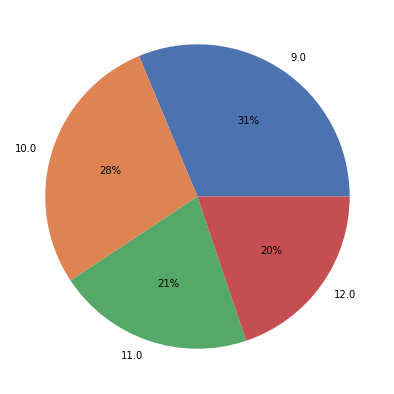

,creation_month,posts_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


In [25]:
data = query_9['posts_count']
labels = query_9['creation_month']
sns.set_palette('deep') 
plt.figure(figsize=(7, 7))

plt.pie(data, labels=labels, autopct='%.0f%%')
plt.show()
query_9

**Вывод**

Больше всего постов было в сентябре и октябре, затем количество постов снизилось почти на треть (63100 против 47000)

## Задание 10

Выгрузить данные активности пользователя, который опубликовал больше всего постов за всё время. Вывести данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [26]:
query = '''
SELECT DISTINCT(EXTRACT(WEEK FROM creation_date)) AS week_creation,
       LAST_VALUE(creation_date) OVER(ORDER BY (EXTRACT(WEEK FROM creation_date))) AS creation_date
FROM stackoverflow.posts
WHERE user_id IN 
                (SELECT user_id
                 FROM stackoverflow.posts
                 GROUP BY user_id
                 ORDER BY COUNT(id) DESC
                 LIMIT 1)
              AND  DATE_TRUNC('month', creation_date) = '2008-10-01'
''' 

query_10 = pd.read_sql_query(query, con=engine)

In [27]:
query_10

,week_creation,creation_date
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 21:54:56
